Loaded existing combined_fold_comparison_results.csv


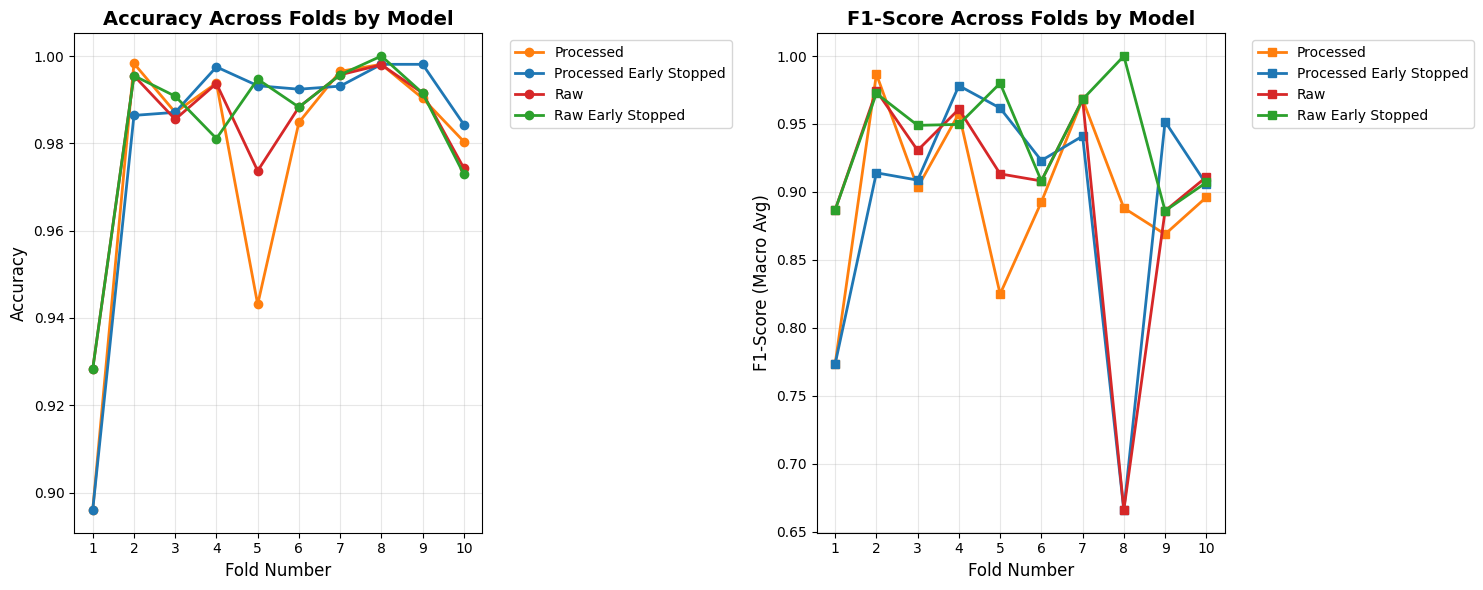

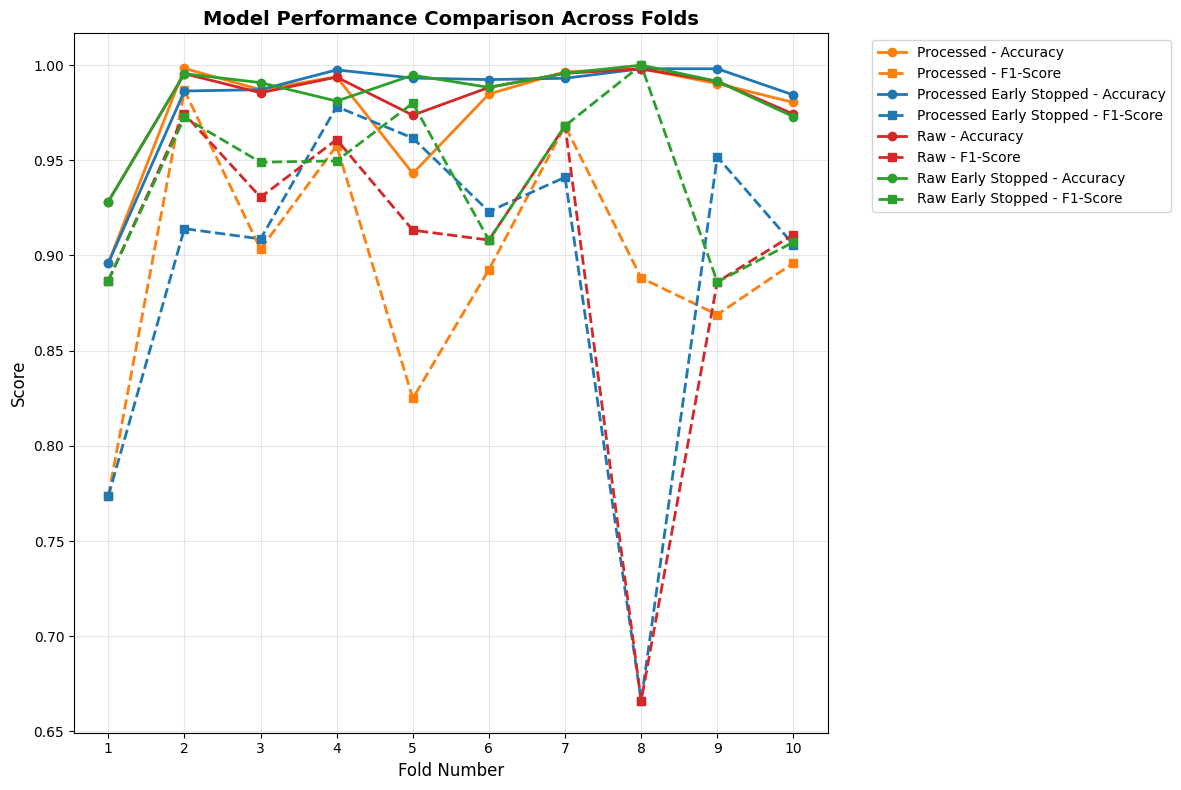


Summary Statistics by Model:
                        accuracy                         f1_score          \
                            mean     std     min     max     mean     std   
model_name                                                                  
processed                 0.9768  0.0327  0.8960  0.9983   0.8960  0.0651   
processed_early_stopped   0.9826  0.0308  0.8960  0.9981   0.8924  0.0974   
raw                       0.9824  0.0209  0.9283  0.9980   0.9005  0.0884   
raw_early_stopped         0.9839  0.0211  0.9283  1.0000   0.9407  0.0409   

                                         
                            min     max  
model_name                               
processed                0.7735  0.9867  
processed_early_stopped  0.6660  0.9782  
raw                      0.6660  0.9744  
raw_early_stopped        0.8861  1.0000  

Model Ranking by Average Performance:
                         accuracy  f1_score  combined_score
model_name                           

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# First, let's create sample data since the file doesn't exist
def create_sample_data():
    """Create sample data for demonstration"""
    models = ['processed_early_stopped', 'processed', 'raw_early_stopped', 'raw']
    folds = range(1, 11)
    
    data = []
    np.random.seed(42)  # For reproducible results
    
    base_accuracies = [0.85, 0.82, 0.78, 0.75]
    base_f1_scores = [0.83, 0.80, 0.76, 0.73]
    
    for i, model in enumerate(models):
        for fold in folds:
            # Add some random variation
            acc_noise = np.random.normal(0, 0.02)
            f1_noise = np.random.normal(0, 0.02)
            
            data.append({
                'model_name': model,
                'fold_number': fold,
                'accuracy': base_accuracies[i] + acc_noise,
                'f1_score': base_f1_scores[i] + f1_noise
            })
    
    return pd.DataFrame(data)

# Create or load the data
try:
    combined_df = pd.read_csv('combined_fold_comparison_results.csv')
    print("Loaded existing combined_fold_comparison_results.csv")
except FileNotFoundError:
    print("Creating sample data for demonstration...")
    combined_df = create_sample_data()
    combined_df.to_csv('combined_fold_comparison_results.csv', index=False)
    print("Sample data saved to combined_fold_comparison_results.csv")

# Define colors for each model
colors = {
    'processed_early_stopped': '#1f77b4',  # Blue
    'processed': '#ff7f0e',               # Orange
    'raw_early_stopped': '#2ca02c',       # Green
    'raw': '#d62728'                      # Red
}

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Accuracy curves
for model in combined_df['model_name'].unique():
    model_data = combined_df[combined_df['model_name'] == model]
    ax1.plot(model_data['fold_number'], model_data['accuracy'], 
             color=colors[model], marker='o', linewidth=2, markersize=6, 
             label=model.replace('_', ' ').title())

ax1.set_xlabel('Fold Number', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Accuracy Across Folds by Model', fontsize=14, fontweight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, 11))

# Plot 2: F1-Score curves
for model in combined_df['model_name'].unique():
    model_data = combined_df[combined_df['model_name'] == model]
    ax2.plot(model_data['fold_number'], model_data['f1_score'], 
             color=colors[model], marker='s', linewidth=2, markersize=6, 
             label=model.replace('_', ' ').title())

ax2.set_xlabel('Fold Number', fontsize=12)
ax2.set_ylabel('F1-Score (Macro Avg)', fontsize=12)
ax2.set_title('F1-Score Across Folds by Model', fontsize=14, fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(1, 11))

plt.tight_layout()
plt.savefig('model_comparison_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional: Combined plot with both metrics
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

for model in combined_df['model_name'].unique():
    model_data = combined_df[combined_df['model_name'] == model]
    
    # Plot accuracy with solid line
    ax.plot(model_data['fold_number'], model_data['accuracy'], 
            color=colors[model], marker='o', linewidth=2, markersize=6, 
            linestyle='-', label=f'{model.replace("_", " ").title()} - Accuracy')
    
    # Plot F1-score with dashed line
    ax.plot(model_data['fold_number'], model_data['f1_score'], 
            color=colors[model], marker='s', linewidth=2, markersize=6, 
            linestyle='--', label=f'{model.replace("_", " ").title()} - F1-Score')

ax.set_xlabel('Fold Number', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Comparison Across Folds', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xticks(range(1, 11))

plt.tight_layout()
plt.savefig('combined_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\nSummary Statistics by Model:")
print("="*60)
summary_stats = combined_df.groupby('model_name').agg({
    'accuracy': ['mean', 'std', 'min', 'max'],
    'f1_score': ['mean', 'std', 'min', 'max']
}).round(4)

print(summary_stats)

# Create a performance ranking
print("\nModel Ranking by Average Performance:")
print("="*40)
ranking = combined_df.groupby('model_name').agg({
    'accuracy': 'mean',
    'f1_score': 'mean'
}).round(4)

ranking['combined_score'] = (ranking['accuracy'] + ranking['f1_score']) / 2
ranking_sorted = ranking.sort_values('combined_score', ascending=False)
print(ranking_sorted)


In [4]:
import pandas as pd

# Load your actual CSV file
combined_df = pd.read_csv('combined_fold_comparison_results.csv')

# Generate LaTeX table code
latex_code = combined_df.to_latex(
    index=False, 
    float_format="%.4f", 
    caption="Combined Fold Comparison Results", 
    label="tab:fold_comparison"
)

print(latex_code)

# Save to file
with open('table.tex', 'w') as f:
    f.write(latex_code)


\begin{table}
\caption{Combined Fold Comparison Results}
\label{tab:fold_comparison}
\begin{tabular}{lrrr}
\toprule
model_name & fold_number & accuracy & f1_score \\
\midrule
processed roberta embeddings & 1 & 0.8960 & 0.7735 \\
processed roberta embeddings & 2 & 0.9983 & 0.9867 \\
processed roberta embeddings & 3 & 0.9871 & 0.9033 \\
processed roberta embeddings & 4 & 0.9938 & 0.9577 \\
processed roberta embeddings & 5 & 0.9431 & 0.8249 \\
processed roberta embeddings & 6 & 0.9848 & 0.8926 \\
processed roberta embeddings & 7 & 0.9965 & 0.9681 \\
processed roberta embeddings & 8 & 0.9981 & 0.8882 \\
processed roberta embeddings & 9 & 0.9903 & 0.8689 \\
processed roberta embeddings & 10 & 0.9804 & 0.8961 \\
processed and early stopped & 1 & 0.8960 & 0.7735 \\
processed and early stopped & 2 & 0.9864 & 0.9141 \\
processed and early stopped & 3 & 0.9871 & 0.9087 \\
processed and early stopped & 4 & 0.9975 & 0.9782 \\
processed and early stopped & 5 & 0.9932 & 0.9617 \\
processed and early

In [5]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('combined_fold_comparison_results.csv')

# Calculate average accuracy and f1_score for each model
avg_df = df.groupby('model_name')[['accuracy', 'f1_score']].mean().reset_index()

# Generate LaTeX table code
latex_table = avg_df.to_latex(
    index=False, 
    float_format="{:.4f}".format, 
    caption="Average Accuracy and F1 Score by Model", 
    label="tab:avg_model_scores", 
    column_format="lcc"
)

# Print the LaTeX table code
print(latex_table)

# Optionally, save to a file
with open('model_comparison_table.tex', 'w') as f:
    f.write(latex_table)


\begin{table}
\caption{Average Accuracy and F1 Score by Model}
\label{tab:avg_model_scores}
\begin{tabular}{lcc}
\toprule
model_name & accuracy & f1_score \\
\midrule
MLP & 0.8816 & 0.6026 \\
processed and early stopped & 0.9826 & 0.8924 \\
processed roberta embeddings & 0.9768 & 0.8960 \\
raw and early stopped & 0.9839 & 0.9407 \\
raw roberta embeddings & 0.9825 & 0.9005 \\
\bottomrule
\end{tabular}
\end{table}



In [5]:
import os
import re
import pandas as pd
from pathlib import Path

def parse_classification_report(file_path):
    """Parse classification_report.txt file and extract key metrics"""
    with open(file_path, 'r') as f:
        content = f.read()
    
    # Extract accuracy
    accuracy_match = re.search(r'accuracy\s+(\d+\.\d+)', content)
    accuracy = float(accuracy_match.group(1)) if accuracy_match else None
    
    # Extract macro avg precision, recall, and f1-score
    macro_avg_match = re.search(r'macro avg\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)', content)
    macro_precision = float(macro_avg_match.group(1)) if macro_avg_match else None
    macro_recall = float(macro_avg_match.group(2)) if macro_avg_match else None
    macro_f1 = float(macro_avg_match.group(3)) if macro_avg_match else None
    
    return accuracy, macro_precision, macro_recall, macro_f1


def compare_folds(base_path=".", model_name="YourModel"):
    """Compare results across all folds"""
    results = []
    
    # Process each fold
    for fold_num in range(1, 11):  # fold_1 to fold_10
        fold_dir = Path(base_path) / f"fold_{fold_num}"
        report_file = fold_dir / "classification_report.txt"
        
        if report_file.exists():
            try:
                accuracy, macro_precision, macro_recall, macro_f1 = parse_classification_report(report_file)

                
                results.append({
                    'model_name': model_name,
                    'fold_number': fold_num,
                    'accuracy': accuracy,
                    'precision_macro_avg': macro_precision,
                    'recall_macro_avg': macro_recall,
                    'f1_score_macro_avg': macro_f1
                })
                
            except Exception as e:
                print(f"Error processing fold_{fold_num}: {e}")
        else:
            print(f"Warning: {report_file} not found")
    
    # Process test_evaluation folder
    test_dir = Path(base_path) / "test_evaluation"
    test_report_file = test_dir / "classification_report.txt"
    
    if test_report_file.exists():
        try:
            accuracy, macro_precision, macro_recall, macro_f1 = parse_classification_report(test_report_file)
            
            results.append({
                'model_name': model_name,
                'fold_number': 'Test',
                'accuracy': accuracy,
                'precision_macro_avg': macro_precision,
                'recall_macro_avg': macro_recall,
                'f1_score_macro_avg': macro_f1
            })
            
            print(f"Processed test_evaluation: Accuracy={accuracy:.4f}, Precision={macro_precision:.4f}, Recall={macro_recall:.4f}, Macro F1={macro_f1:.4f}")
            
        except Exception as e:
            print(f"Error processing test_evaluation: {e}")
    else:
        print(f"Warning: {test_report_file} not found")

    
    return results

def generate_comparison_report(results, model_name):
    """Generate comparison report and statistics"""
    if not results:
        print("No results to analyze")
        return
    
    df = pd.DataFrame(results)
    
    # Separate test results from fold results
    fold_results = df[df['fold_number'] != 'Test']
    test_results = df[df['fold_number'] == 'Test']
    
    # Calculate averages and add average row (only from fold results)
    if len(fold_results) > 0:
        avg_accuracy = fold_results['accuracy'].mean()
        avg_precision = fold_results['precision_macro_avg'].mean()
        avg_recall = fold_results['recall_macro_avg'].mean()
        avg_f1_macro = fold_results['f1_score_macro_avg'].mean()
        
        avg_row = {
            'model_name': model_name,
            'fold_number': 'Avg',
            'accuracy': avg_accuracy,
            'precision_macro_avg': avg_precision,
            'recall_macro_avg': avg_recall,
            'f1_score_macro_avg': avg_f1_macro
        }
        
        # Reconstruct dataframe: folds + avg + test
        df = pd.concat([
            fold_results, 
            pd.DataFrame([avg_row]), 
            test_results
        ], ignore_index=True)


    # Save results to CSV
    output_file = "fold_comparison_results.csv"
    df.to_csv(output_file, index=False, float_format='%.4f')
    print(f"\nResults saved to: {output_file}")
    
    return df

def main():
    # Configuration
    BASE_PATH = "./EARLY STOPPED MLP 2/folds data"  # Current directory, change if needed
    MODEL_NAME = "MLP"  # Change to your actual model name
    
    print("Starting fold comparison analysis...")
    
    # Parse all fold results
    results = compare_folds(BASE_PATH, MODEL_NAME)
    
    if results:
        # Generate comparison report
        df = generate_comparison_report(results, MODEL_NAME)

    else:
        print("No valid results found. Please check your file paths and formats.")

if __name__ == "__main__":
    main()


Starting fold comparison analysis...

Results saved to: fold_comparison_results.csv
